In [1]:
#!/usr/bin/env python3
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from helper import varDict,getTitleFromDF

try:
    import mplhep as hep
    hep.style.use("ATLAS")
except:
    pass


### Get B2TF recast data

In [2]:
b2tf_effs_R = np.genfromtxt('./b2tf_trigger_effs.csv',delimiter=',',names=True)
b2tf_data_df_R = pd.DataFrame(b2tf_effs_R,columns=b2tf_effs_R.dtype.names)
b2tf_data_df_R['dm'] = b2tf_data_df_R['m1']-b2tf_data_df_R['m0']
b2tf_data_df_R['ctau'] = (b2tf_data_df_R['tau']*2.99e8).round(0)
b2tf_data_df_R['ctau_full'] = (b2tf_data_df_R['tau']*2.99e8)

In [3]:
b2tf_data_df_R['ms'].unique(),b2tf_data_df_R['ctau'].unique()

(array([ 250.,  500., 1000., 2000.]), array([ 1.,  5., 10., 20., 39., 40.]))

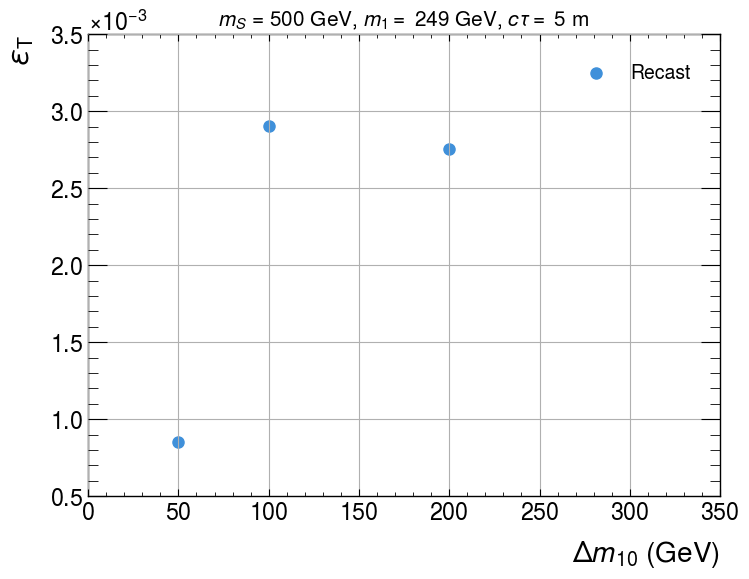

In [12]:
constraints = {'ms' : 500.0, 'ctau' : 5.0}
xaxis = 'dm'
yaxis = 'eff'
# Filter data
b2tf_data_df_filter_R = b2tf_data_df_R.copy()
for label,val in constraints.items():
    b2tf_data_df_filter_R = b2tf_data_df_filter_R[(np.abs(b2tf_data_df_filter_R[label]-val) < 0.1)]

plt.scatter(b2tf_data_df_filter_R[xaxis],b2tf_data_df_filter_R[yaxis],label='Recast',alpha=1.0)
plt.xlabel(r'%s' %varDict[xaxis])
plt.ylabel(r'%s' %varDict[yaxis])
plt.xlim(0,350.)
plt.grid()
plt.title(getTitleFromDF(b2tf_data_df_filter_R),fontsize=15)
plt.legend()
plt.show()

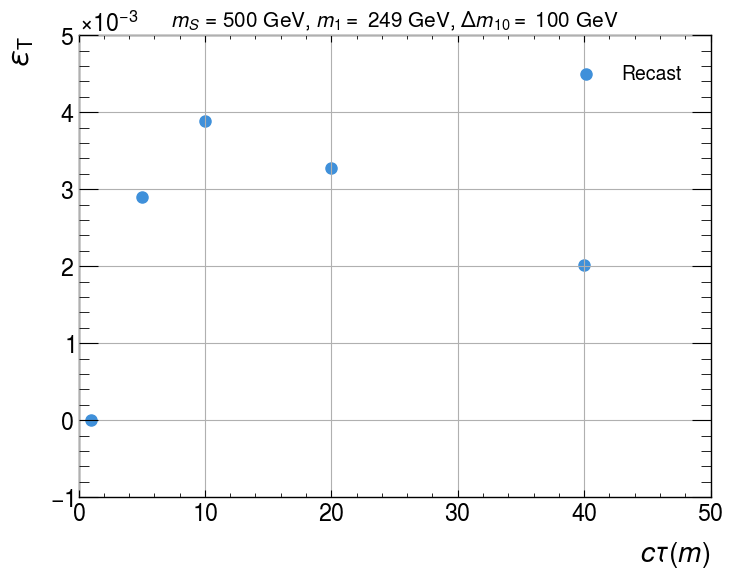

In [13]:
constraints = {'ms' : 500.0, 'dm' : 100.0}
xaxis = 'ctau'
yaxis = 'eff'
# Filter data
b2tf_data_df_filter_R = b2tf_data_df_R.copy()
for label,val in constraints.items():
    b2tf_data_df_filter_R = b2tf_data_df_filter_R[(np.abs(b2tf_data_df_filter_R[label]-val) < 0.1)]

plt.scatter(b2tf_data_df_filter_R[xaxis],b2tf_data_df_filter_R[yaxis],label='Recast',alpha=1.0)
plt.xlabel(r'%s' %varDict[xaxis])
plt.ylabel(r'%s' %varDict[yaxis])
plt.xlim(0,50.)
plt.grid()
plt.title(getTitleFromDF(b2tf_data_df_filter_R),fontsize=15)
plt.legend()
plt.show()

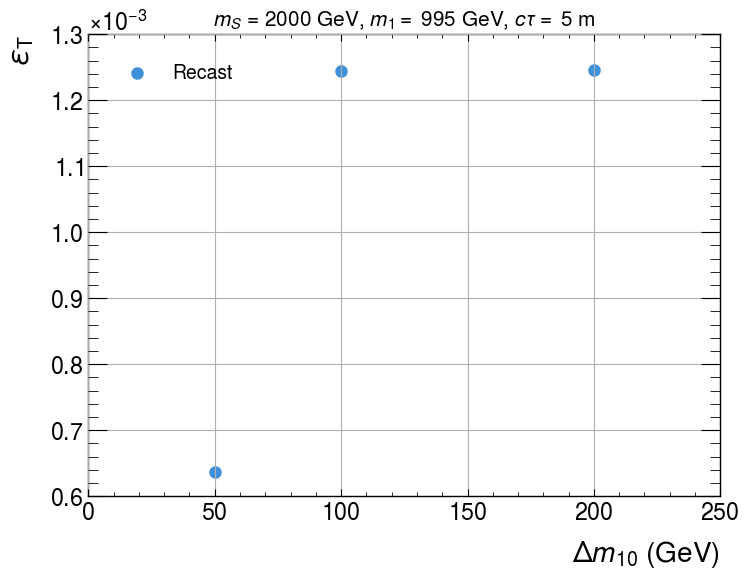

In [14]:
constraints = {'ms' : 2000.0, 'ctau' : 5.0}
xaxis = 'dm'
yaxis = 'eff'
# Filter data
b2tf_data_df_filter_R = b2tf_data_df_R.copy()
for label,val in constraints.items():
    b2tf_data_df_filter_R = b2tf_data_df_filter_R[(np.abs(b2tf_data_df_filter_R[label]-val) < 0.1)]

plt.scatter(b2tf_data_df_filter_R[xaxis],b2tf_data_df_filter_R[yaxis],label='Recast',alpha=1.0)
plt.xlabel(r'%s' %varDict[xaxis])
plt.ylabel(r'%s' %varDict[yaxis])
plt.xlim(0,250.)
plt.grid()
plt.title(getTitleFromDF(b2tf_data_df_filter_R),fontsize=15)
plt.legend()
plt.show()

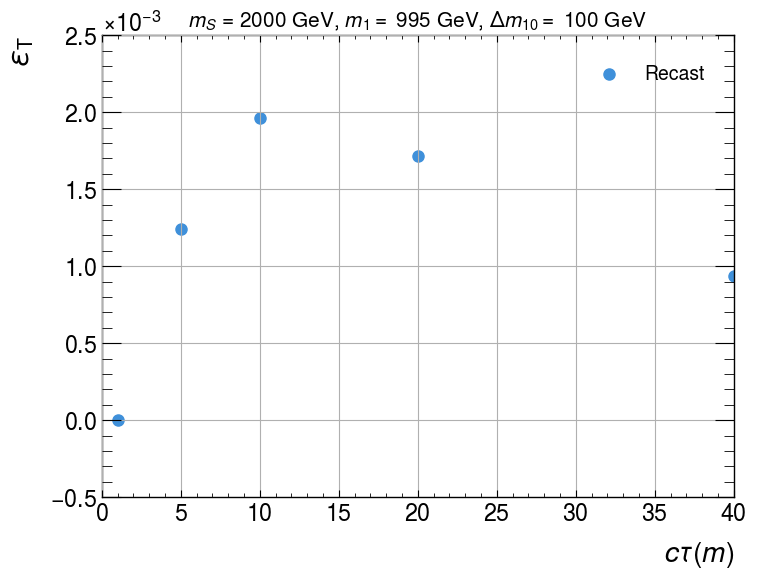

In [16]:
constraints = {'ms' : 2000.0, 'dm' : 100.0}
xaxis = 'ctau'
yaxis = 'eff'
# Filter data
b2tf_data_df_filter_R = b2tf_data_df_R.copy()
for label,val in constraints.items():
    b2tf_data_df_filter_R = b2tf_data_df_filter_R[(np.abs(b2tf_data_df_filter_R[label]-val) < 0.1)]

plt.scatter(b2tf_data_df_filter_R[xaxis],b2tf_data_df_filter_R[yaxis],label='Recast',alpha=1.0)
plt.xlabel(r'%s' %varDict[xaxis])
plt.ylabel(r'%s' %varDict[yaxis])
# plt.xlim(0,250.)
plt.grid()
plt.title(getTitleFromDF(b2tf_data_df_filter_R),fontsize=15)
plt.legend()
plt.show()

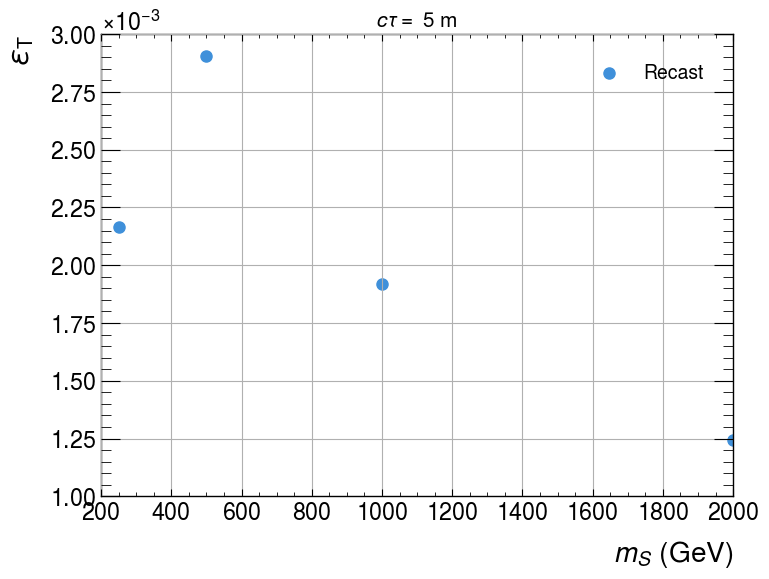

In [20]:
constraints = {'dm' : 100.0, 'ctau' : 5.0}
xaxis = 'ms'
yaxis = 'eff'
# Filter data
b2tf_data_df_filter_R = b2tf_data_df_R.copy()
for label,val in constraints.items():
    b2tf_data_df_filter_R = b2tf_data_df_filter_R[(np.abs(b2tf_data_df_filter_R[label]-val) < 0.1)]

plt.scatter(b2tf_data_df_filter_R[xaxis],b2tf_data_df_filter_R[yaxis],label='Recast',alpha=1.0)
plt.xlabel(r'%s' %varDict[xaxis])
plt.ylabel(r'%s' %varDict[yaxis])
# plt.xlim(0,250.)
plt.grid()
plt.title(getTitleFromDF(b2tf_data_df_filter_R),fontsize=15)
plt.legend()
plt.show()